# Решение задачи оптимизации функции полезности потребителя

Студент: Багрова К.В.  
Группа: УСБО-01-22

### Раздел 1: Постановка задачи и исходные данные 

Олег типичный рациональный потебитель. В летнее время он любит готовить салат из товаров Х и У, цены на которые соответственно равны 130 и 210 д.е. Часть заработной платы, которую Олег готов потратить на приготовление салата, равна 5000 д.е. должна быть полностью израсходована на продукты для салата. Для этого ему необходимо определить наиболее оптимальный набор товаров U(x,y).

Функция полезности от потребления набора товаров Х и У может быть задана как x**(1/2) * y**(1/3), из неё Олег стремится извлечь максимальную пользу. Олег потребляет не больше 100 ед. товара Х, на оставшиеся средства он покупает товар У.

#### Математическую модель можно определить так:

Max  U(X,Y) = x**(1/2) * y**(1/3)                   (кривая безразличия)  
     Рх = 130                                       (цена товара Х)  
     Ру = 210                                       (цена товара У)  
     Рх * x + Ру * y = w                            (располагаемый бюджет)  
     х < 100                                        (потребление товара Х)  
     y = w/Рх - (Рх * x/Ру)                         (потребление товара У)  
     x,y >= 0

Целевая функция - максимум полезности - определяется в условии 1. Цены на товары Х и У определены в условиях 2 и 3. Бюджетное ограничение следует из условия 4. В пунктах 5 и 6 определено потребление набора товаров. Количество товаров не может быть отрицательным.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Работа основана на экономической теории в рамках ординалистической теории полезности, которая используется для относительного измерения полезности благ.

### Раздел 2: Решение задачи

Зададим параметры и построим линию бюджетного ограничения.

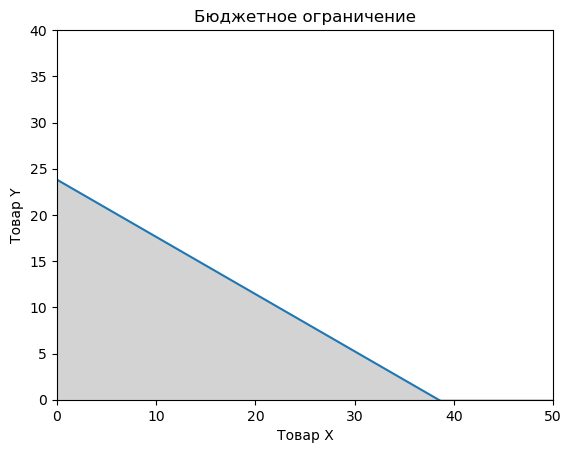

In [15]:
x = np.arange(0, 100, 5)
w = 5000
p = [130,210]
y = w/p[1]-(p[0]*x/p[1])

plt.plot(x,y)
plt.ylim([0,40])
plt.xlim([0,50])
plt.xlabel("Товар X")
plt.ylabel("Товар Y")
plt.title("Бюджетное ограничение")
plt.fill_between(x, y, color="lightgrey")
plt.show()

Определим функцию кривой безразличия как U(X,Y) = x**(1/2) * y**(1/3)
При ограничениях Рх * x + Ру * y = w и x,y>=0.

Решением будет максимизация функции. Поскольку большинство оптимизационных программ предназначены 
для минимизации целевой функции, преобразуем функцию полезности в отрицательную.

In [16]:
# Определим бюджетное ограничение
def res_1(x):
    w = 5000
    p = [130, 210]
    return -w + p[0] * x[0] + p[1] * x[1]

# Определим значения целевой функции
def obj(X):
    x,y = X
    a = 1/2
    b = 1/3
    return -(x**(a)*y**(b))

b = (0, 100)  #зададим границы переменных
bnds = (b, b)
res = [{'type': 'eq', 'fun': res_1}] #ограничение равенства

# используем метод наименьших квадратов для нахождения минимума функции
solution = minimize(obj, (0, 0), method="SLSQP", constraints=res, bounds=bnds) 
optimo  = solution.x

print(optimo)

[23.07654106  9.52404601]


Text(0.5, 1.0, 'Точка оптимума')

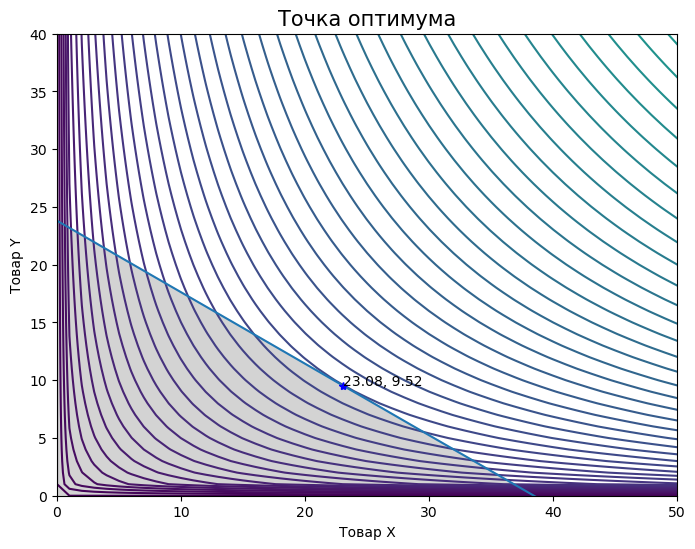

In [17]:
x = y = np.arange(0, 100, 1)
X, Y  = np.meshgrid(x,y) # создадим двумерную систему координат

# определим координаты линий семейства кривых безразличия
def func(f, X,Y):
    s = np.shape(X)
    return f(np.vstack([X.ravel(),Y.ravel()])).reshape(*s) 

# Определим значения функции полезности, вложенная функция
def obj(X):
    x,y = X
    a = 1/2
    b = 1/3
    return (x**(a) * y**(b))

fig, ax  = plt.subplots(figsize=(8, 6))
c = ax.contour(X,Y, func(obj, X,Y), 80)

ax.plot(x, w/p[1]-(p[0]*x/p[1]))
ax.fill_between(x, w/p[1]-(p[0]*x/p[1]), color='lightgrey') 
ax.set_ylim(0, 40)
ax.set_xlim(0, 50)

ax.plot(optimo[0], optimo[1], "b*")
ax.text(optimo[0], optimo[1], "%s, %s"%(round(optimo[0],2), round(optimo[1],2)))

ax.set_ylabel("Товар Y")
ax.set_xlabel("Товар X")
ax.set_title("Точка оптимума", fontsize=15)

### Раздел 3: Выводы

Максимальная польза для Олега получается при потреблении 23.08 товара Х и 9.52 товара У. 
Точка оптимума является точкой касания кривой безразличия к линии бюджетного ограничения.